In [1]:
import pandas as pd
import numpy as np

# Relative path to the dataset
file_path_Alzheimer = "../../data/raw/ALZHEIMER_Dataset/Dataset/alzheimers_disease_data.csv"

# Load the dataset
data_Alzheimer = pd.read_csv(file_path_Alzheimer)

print(data_Alzheimer.info()) ## Check if there's any Null Info and check variable type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [2]:
## Verify if Data is imbalanced or balaneced

print("Alzheimer Diagnosis Distribution:\n", data_Alzheimer['Diagnosis'].value_counts())

## This step is vital because if an Algorithm is trained with most of the patients having no Alzheimer, it will 
## Tend to favour training towards that aspect

## Proportion of 0s (no Alzheimer's): 64.6 %
## Proportion of 1s (Alzheimer's): 35.4 %

Alzheimer Diagnosis Distribution:
 Diagnosis
0    1389
1     760
Name: count, dtype: int64


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning Data
columns_to_drops = ['DoctorInCharge', 'EducationLevel', 'PatientID', 'Diagnosis']
numeric_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'SleepQuality' ,'DietQuality', 'ADL', 'FunctionalAssessment', 'CholesterolTriglycerides', 'CholesterolHDL', 'CholesterolLDL', 'CholesterolTotal', 'DiastolicBP', 'SystolicBP']

# Calcular a matriz de correlação

# Remover as colunas 'EducationLevel' e 'DoctorInCharge' do conjunto de dados de treinamento
data_Alzheimer_cleaned = data_Alzheimer.drop(columns=columns_to_drops)

In [6]:
from sklearn.model_selection import train_test_split

X_Alzheimer = data_Alzheimer_cleaned.copy()
y_Alzheimer = data_Alzheimer['Diagnosis']

X_train_alzheimer, X_test_alzheimer, y_train_alzheimer, y_test_alzheimer = train_test_split( X_Alzheimer, y_Alzheimer, test_size=0.2, random_state=42 )

X_train_alzheimer.head()

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
1433,87,1,2,27.764232,1,16.543170,0.281379,5.923418,7.836104,0,...,25.399206,3.085543,0,0,6.643693,0,0,0,0,0
630,70,0,0,37.098744,0,1.360202,9.242990,1.819284,5.218052,1,...,8.292136,5.616830,0,1,3.884562,0,0,0,0,1
78,82,1,3,15.908275,0,16.329031,1.915913,6.607292,6.146166,0,...,21.042238,3.662461,0,0,4.013722,0,0,1,1,0
366,76,1,0,30.302432,1,11.814030,6.281170,6.204349,6.825155,0,...,28.609438,4.648135,0,0,9.355700,1,0,1,0,1
1996,61,0,0,24.565357,1,2.273373,9.976581,2.057188,4.715534,0,...,2.629135,9.601238,1,0,8.818932,0,1,0,0,0


In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Aplicar SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_alzheimer, y_train_alzheimer)

# Aplicar Random Under Sampling para undersampling após SMOTE
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_smote, y_train_smote)

# print(y_train_alzheimer.value_counts())
# print(y_train_smote.value_counts())
print(y_train_balanced.value_counts())

Diagnosis
0    1112
1    1112
Name: count, dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


####################################################################

## ARVORE DE DECISÃO ## 

# Inicializar o modelo com hiperparâmetros básicos
## Decision Tree
# clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42, class_weight="balanced")

## Random Forest
# clf = RandomForestClassifier(random_state=42, class_weight="balanced")

## Gradient Boosting
clf = XGBClassifier(random_state=42, subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.01, colsample_bytree=1.0)

## Sub Vector
# clf = SVC(random_state=42)

# Treinar o modelo no conjunto de treino
clf.fit(X_train_alzheimer, y_train_alzheimer)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test_alzheimer)

# Avaliar a acurácia usando os rótulos reais do conjunto de teste
accuracy = accuracy_score(y_test_alzheimer, y_pred)  # Deve comparar com y_test_alzheimer
print(f'Accuracy: {accuracy:.4f}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test_alzheimer, y_pred)  # Usar os rótulos do conjunto de teste
print(f'Confusion Matrix:\n{conf_matrix}')

# Relatório de classificação
class_report = classification_report(y_test_alzheimer, y_pred)  # Usar os rótulos do conjunto de teste
print(f'Classification Report:\n{class_report}')

## -------------------- DECISION TREE 
# Accuracy: 0.9488
# Confusion Matrix:
# [[266  11]
#  [ 11 142]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.96      0.96      0.96       277
#            1       0.93      0.93      0.93       153

#     accuracy                           0.95       430
#    macro avg       0.94      0.94      0.94       430
# weighted avg       0.95      0.95      0.95       430

## -------------------- RANDOM TREE 

# Accuracy: 0.9349
# Confusion Matrix:
# [[272   5]
#  [ 23 130]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.92      0.98      0.95       277
#            1       0.96      0.85      0.90       153

#     accuracy                           0.93       430
#    macro avg       0.94      0.92      0.93       430
# weighted avg       0.94      0.93      0.93       430

## ---------------------- XGBOOST Gradient

# Accuracy: 0.9535
# Confusion Matrix:
# [[271   6]
#  [ 14 139]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.95      0.98      0.96       277
#            1       0.96      0.91      0.93       153

#     accuracy                           0.95       430
#    macro avg       0.95      0.94      0.95       430
# weighted avg       0.95      0.95      0.95       430

Accuracy: 0.9535
Confusion Matrix:
[[271   6]
 [ 14 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.91      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



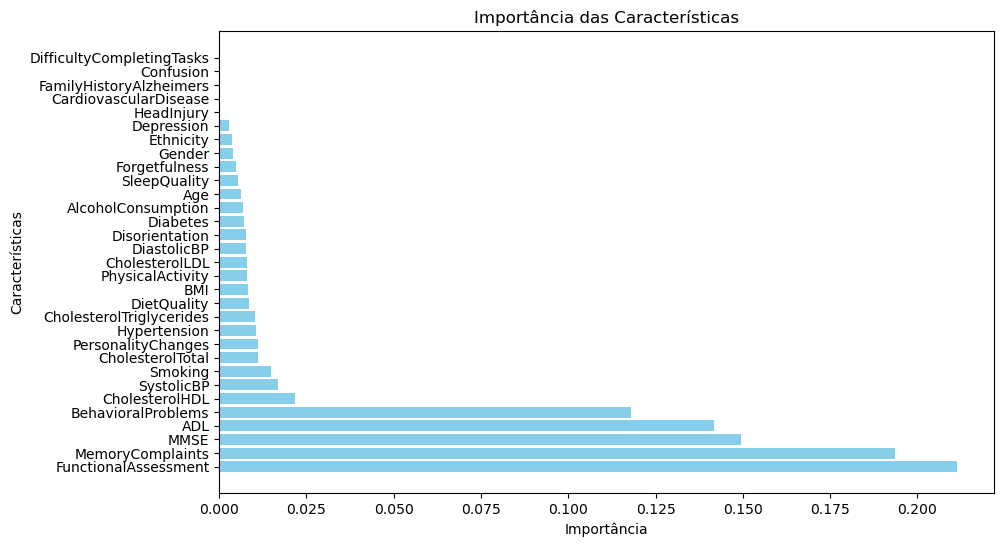

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraindo as importâncias
importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train_alzheimer.columns,
    'Importance': importances
})

# Ordenando por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Importância das Características')
plt.show()

Accuracy: 0.9535
Confusion Matrix:
[[271   6]
 [ 14 139]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.91      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



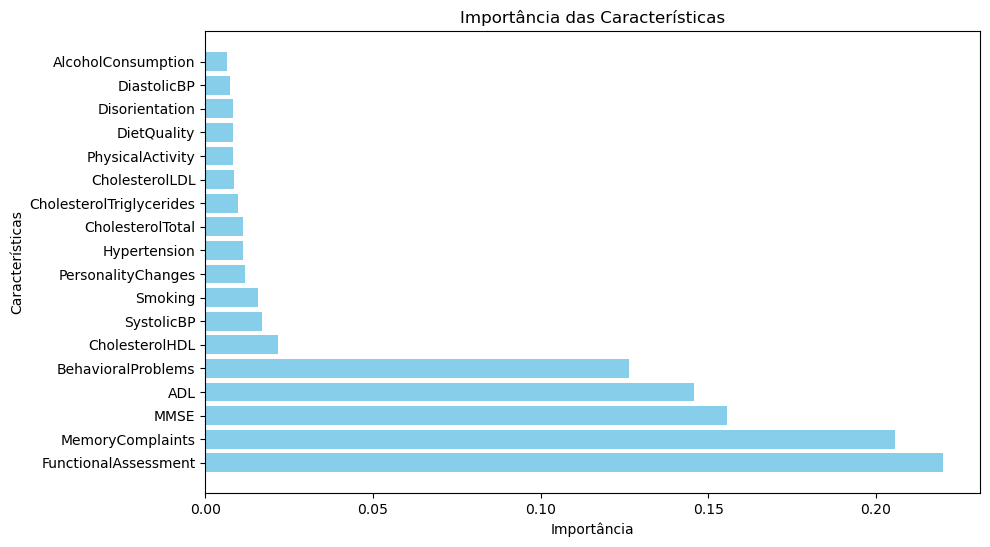

In [37]:
less_important = ["DifficultyCompletingTasks", "Confusion", "FamilyHistoryAlzheimers", "CardiovascularDisease","HeadInjury", "Depression", "Ethnicity", "Gender", "BMI", "Forgetfulness", "SleepQuality", "Age", "Diabetes"]


X_train_alzheimer_important_columns = X_train_alzheimer.drop(columns=less_important)
X_test_alzheimer_important_columns = X_test_alzheimer.drop(columns=less_important)

## Gradient Boosting
clf_important = XGBClassifier(random_state=42, subsample=0.8, n_estimators=100, min_child_weight=1, max_depth=5, learning_rate=0.01, colsample_bytree=1.0)

# Treinar o modelo no conjunto de treino
clf_important.fit(X_train_alzheimer_important_columns, y_train_alzheimer)

# Fazer previsões no conjunto de teste
y_pred_important = clf_important.predict(X_test_alzheimer_important_columns)

# Avaliar a acurácia usando os rótulos reais do conjunto de teste
accuracy_important = accuracy_score(y_test_alzheimer, y_pred_important)  # Deve comparar com y_test_alzheimer
print(f'Accuracy: {accuracy_important:.4f}')

# Matriz de confusão
conf_matrix_important = confusion_matrix(y_test_alzheimer, y_pred_important)  # Usar os rótulos do conjunto de teste
print(f'Confusion Matrix:\n{conf_matrix_important}')

# Relatório de classificação
class_report_important = classification_report(y_test_alzheimer, y_pred_important)  # Usar os rótulos do conjunto de teste
print(f'Classification Report:\n{class_report_important}')

# Extraindo as importâncias
importances = clf_important.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_test_alzheimer_important_columns.columns,
    'Importance': importances
})

# Ordenando por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Importância das Características')
plt.show()



In [39]:
from sklearn.model_selection import cross_val_score

# Validação cruzada no conjunto de treino
cv_scores = cross_val_score(clf, X_train_alzheimer_important_columns, y_train_alzheimer , cv=5)
print(f"Validation Accuracy Scores: {cv_scores}")
print(f"Mean Validation Accuracy: {cv_scores.mean():.4f}")

## Decision Tree
# Validation Accuracy Scores: [0.93604651 0.95348837 0.95639535 0.93023256 0.90087464]
# Mean Validation Accuracy: 0.9354

## Random Forest
# Validation Accuracy Scores: [0.90988372 0.94186047 0.94767442 0.93895349 0.90962099]
# Mean Validation Accuracy: 0.9296

## Gradient Boosting
# Validation Accuracy Scores: [0.93895349 0.96802326 0.95639535 0.94186047 0.93294461]
# Mean Validation Accuracy: 0.9476


Validation Accuracy Scores: [0.93895349 0.96802326 0.95639535 0.94186047 0.9271137 ]
Mean Validation Accuracy: 0.9465
